<a href="https://colab.research.google.com/github/Patriciangugi/dsc-komogorov-smirnov-test-lab/blob/master/The_Kolmogorov_Smirnov_Test_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

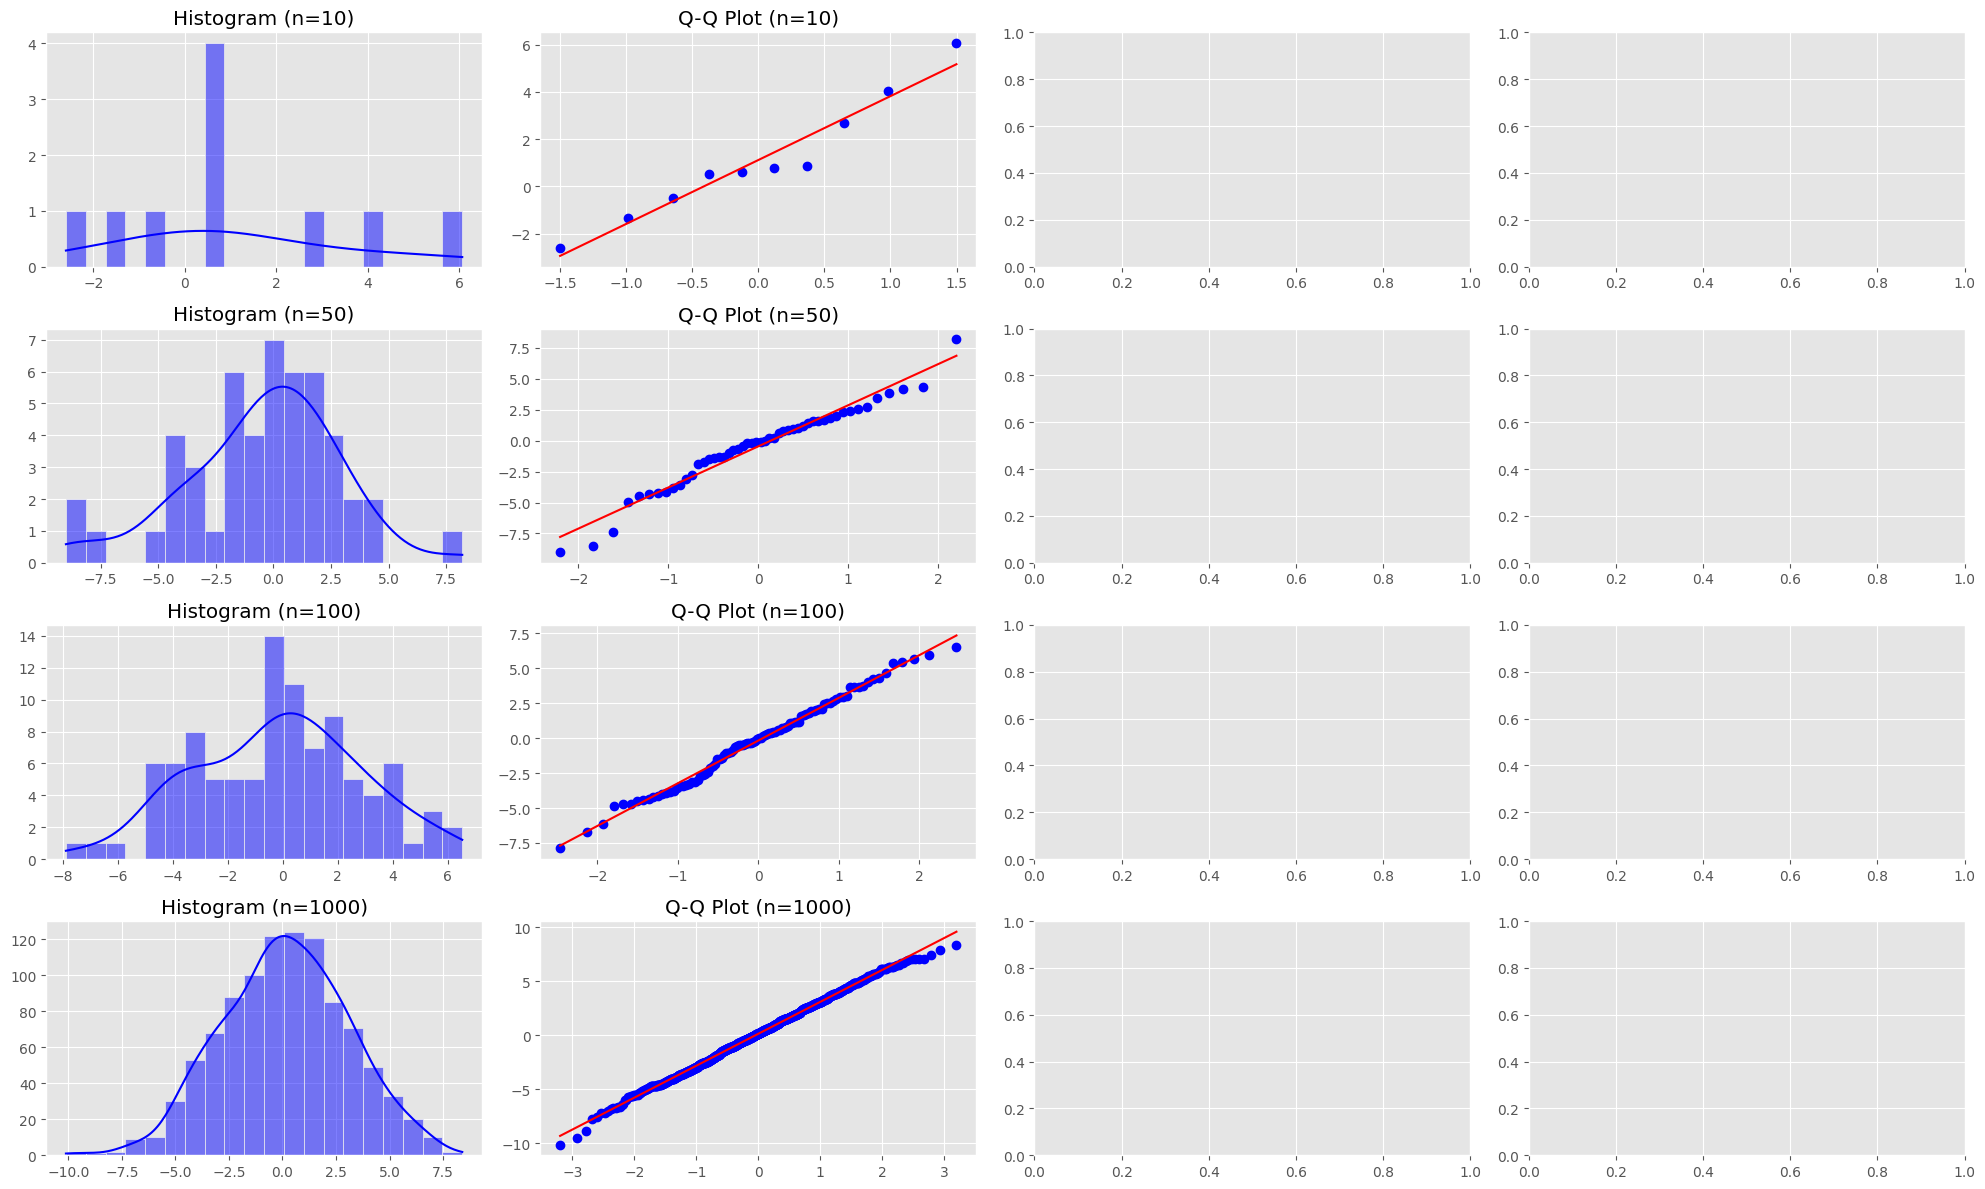

In [4]:
# Plot histograms and Q-Q plots for above datasets
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

sizes = [10, 50, 100, 1000]
datasets = {size: stats.norm.rvs(loc=0, scale=3, size=size) for size in sizes}

# Function to plot histograms and Q-Q plots
def plot_datasets(datasets):
    fig, axes = plt.subplots(nrows=len(datasets), ncols=4, figsize=(20, 12))

    for i, (size, data) in enumerate(datasets.items()):
        # Histogram
        sns.histplot(data, kde=True, ax=axes[i, 0], color='blue', bins=20)
        axes[i, 0].set_title(f'Histogram (n={size})')
        axes[i, 0].set_xlabel('')
        axes[i, 0].set_ylabel('')

        # Q-Q Plot
        stats.probplot(data, dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'Q-Q Plot (n={size})')
        axes[i, 1].set_xlabel('')
        axes[i, 1].set_ylabel('')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot histograms and Q-Q plots
plot_datasets(datasets)

Q-Q Plots provide a more rigorous test of normality, especially for larger samples, by directly comparing the quantiles of the sample data to a normal distribution. They are more robust for assessing normality, but interpretation can be more complex.

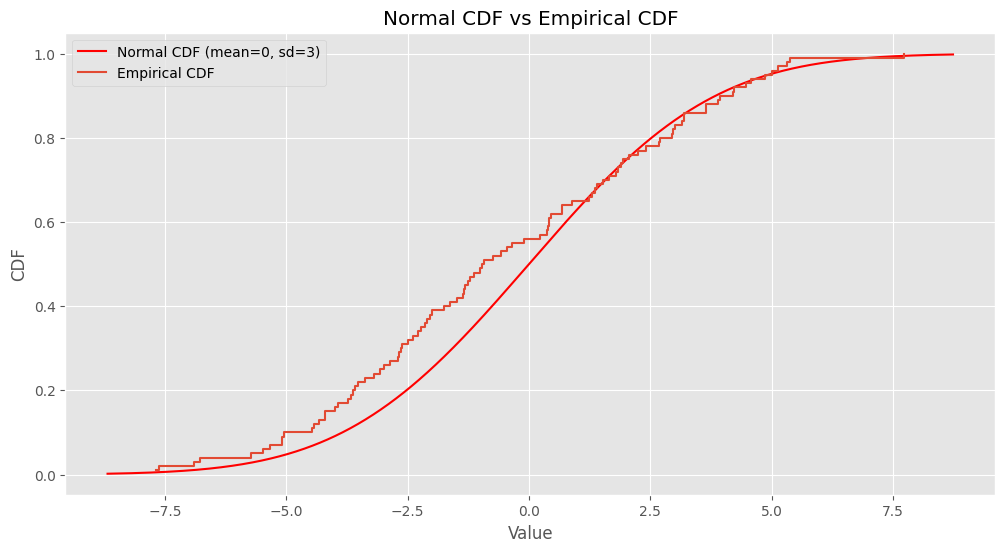

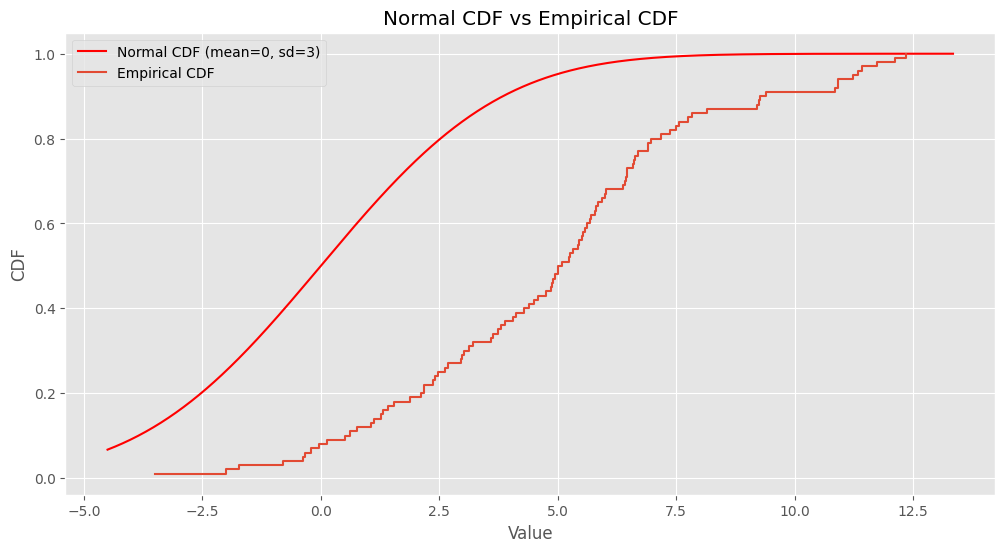

In [6]:
def ecdf(data):
    """Calculate the empirical CDF for a dataset."""
    sorted_data = np.sort(data)
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, y

def ks_plot(data):
    """Plot the normal CDF and empirical CDF for a given dataset."""
    # Parameters for the normal distribution
    mean = 0
    sd = 3

    # Generate normal CDF
    x = np.linspace(min(data) - 1, max(data) + 1, 1000)
    normal_cdf = stats.norm.cdf(x, loc=mean, scale=sd)

    # Calculate empirical CDF
    sorted_data, empirical_cdf = ecdf(data)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot the normal CDF
    plt.plot(x, normal_cdf, 'r-', label='Normal CDF (mean=0, sd=3)')

    # Plot the empirical CDF
    plt.step(sorted_data, empirical_cdf, where='post', label='Empirical CDF')

    # Labels and legend
    plt.title('Normal CDF vs Empirical CDF')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)

    plt.show()

# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100))
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))

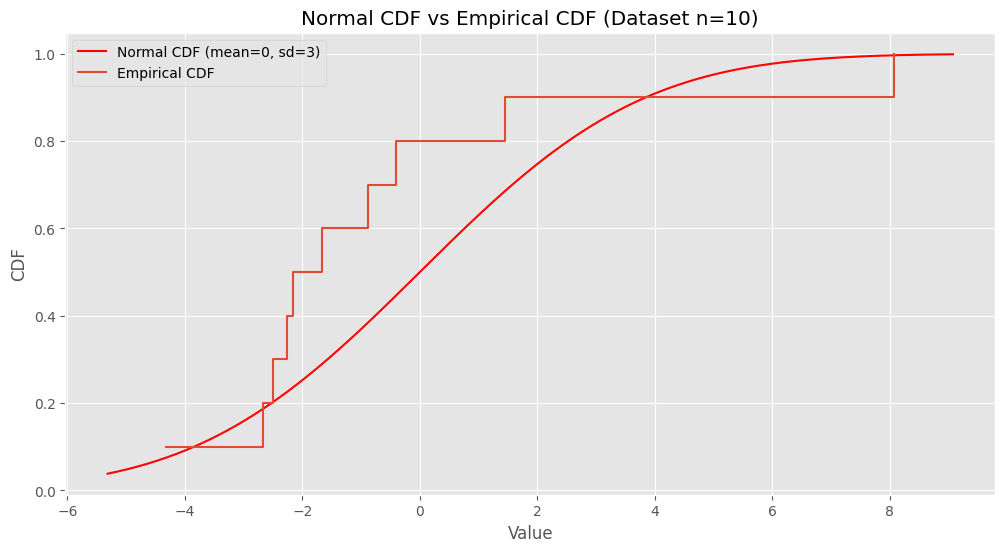

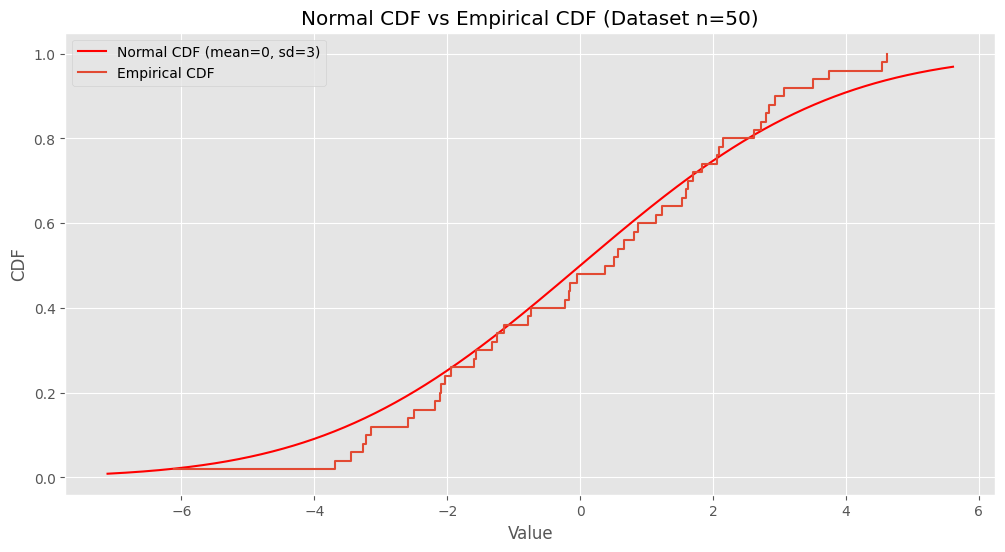

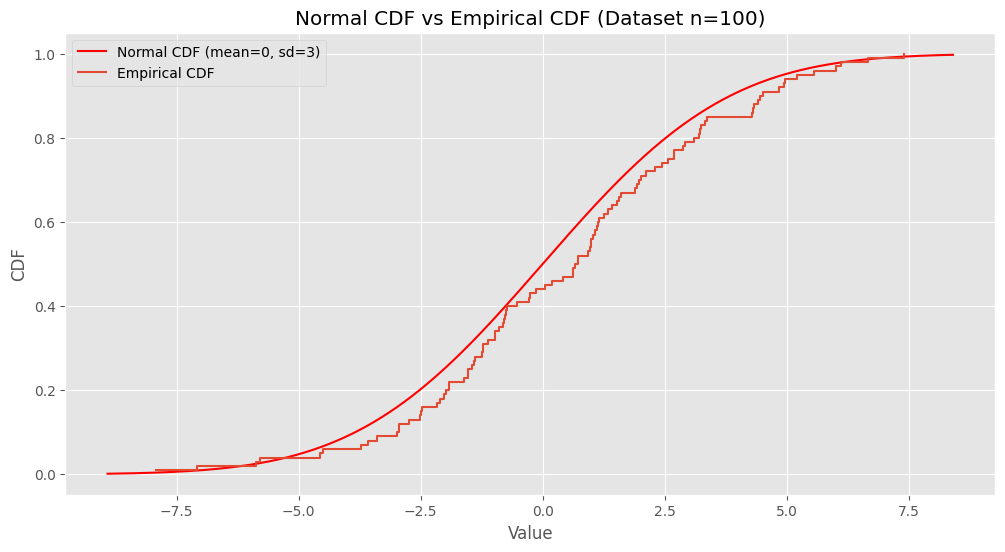

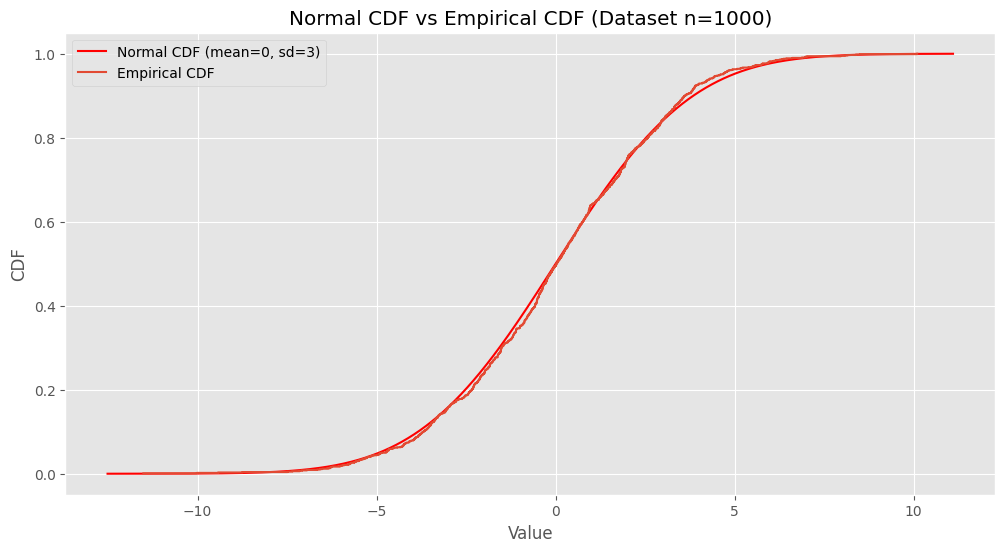

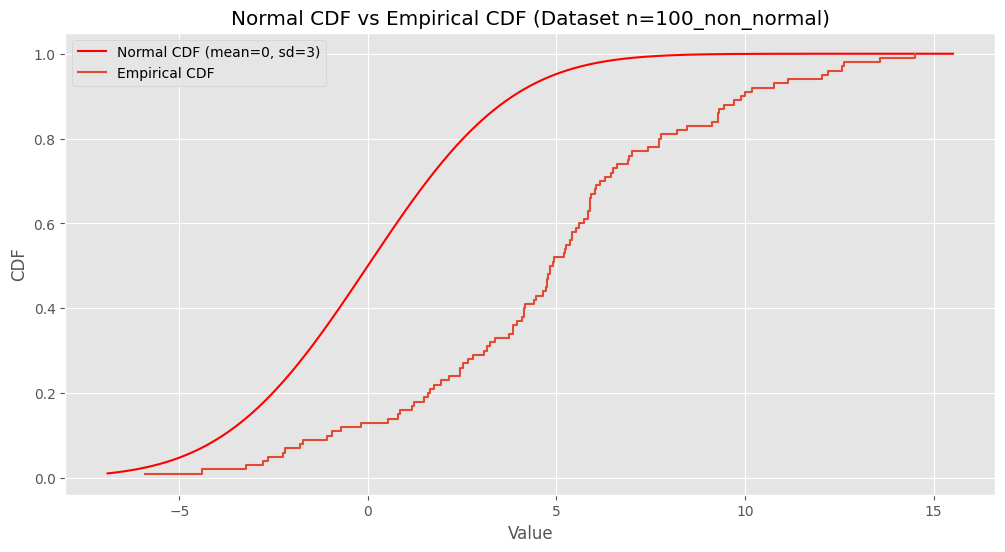

In [7]:
# Define the datasets
datasets = {
    'n=10': stats.norm.rvs(loc=0, scale=3, size=10),
    'n=50': stats.norm.rvs(loc=0, scale=3, size=50),
    'n=100': stats.norm.rvs(loc=0, scale=3, size=100),
    'n=1000': stats.norm.rvs(loc=0, scale=3, size=1000),
    'n=100_non_normal': stats.norm.rvs(loc=5, scale=4, size=100)
}

def ecdf(data):
    """Calculate the empirical CDF for a dataset."""
    sorted_data = np.sort(data)
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, y

def ks_plot(data, title):
    """Plot the normal CDF and empirical CDF for a given dataset."""
    # Parameters for the normal distribution
    mean = 0
    sd = 3

    # Generate normal CDF
    x = np.linspace(min(data) - 1, max(data) + 1, 1000)
    normal_cdf = stats.norm.cdf(x, loc=mean, scale=sd)

    # Calculate empirical CDF
    sorted_data, empirical_cdf = ecdf(data)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot the normal CDF
    plt.plot(x, normal_cdf, 'r-', label='Normal CDF (mean=0, sd=3)')

    # Plot the empirical CDF
    plt.step(sorted_data, empirical_cdf, where='post', label='Empirical CDF')

    # Labels and legend
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)

    plt.show()

# Apply ks_plot function to each dataset
for label, data in datasets.items():
    ks_plot(data, f'Normal CDF vs Empirical CDF (Dataset {label})')

In [11]:
import scipy.stats as stats
import numpy as np

# Generate some random data for demonstration
rvs = np.random.normal(loc=0, scale=1, size=20)

# Example normal distribution CDF
cdf = 'norm'

# Perform the K-S test
stats.kstest(rvs, cdf, args=(0, 1), N=20, alternative='two-sided', mode='approx')

KstestResult(statistic=0.23811764432269028, pvalue=0.17569819965408087, statistic_location=0.09569260871117524, statistic_sign=-1)

In [12]:
# Define the datasets
datasets = {
    'n=10': stats.norm.rvs(loc=0, scale=3, size=10),
    'n=50': stats.norm.rvs(loc=0, scale=3, size=50),
    'n=100': stats.norm.rvs(loc=0, scale=3, size=100),
    'n=1000': stats.norm.rvs(loc=0, scale=3, size=1000),
    'n=100_non_normal': stats.norm.rvs(loc=5, scale=4, size=100)
}

# Perform K-S test
results = {}
for label, data in datasets.items():
    # Perform K-S test against normal distribution with mean=0 and sd=3
    result = stats.kstest(data, 'norm', args=(0, 3))
    results[label] = result

# Print results
for label, result in results.items():
    print(f"{label}: KstestResult(statistic={result.statistic:.6f}, pvalue={result.pvalue:.6f})")

n=10: KstestResult(statistic=0.512266, pvalue=0.005837)
n=50: KstestResult(statistic=0.083735, pvalue=0.845679)
n=100: KstestResult(statistic=0.143602, pvalue=0.029093)
n=1000: KstestResult(statistic=0.032319, pvalue=0.241908)
n=100_non_normal: KstestResult(statistic=0.520879, pvalue=0.000000)


In [13]:
x_uni = np.random.rand(1000)

# Perform K-S test against a uniform distribution
ks_test_uniform = stats.kstest(x_uni, 'uniform')

# Perform K-S test against a normal distribution with mean=0 and sd=1
ks_test_normal = stats.kstest(x_uni, 'norm', args=(0, 1))

# Print the results
print("K-S Test against Uniform Distribution:")
print(ks_test_uniform)

print("\nK-S Test against Normal Distribution:")
print(ks_test_normal)

K-S Test against Uniform Distribution:
KstestResult(statistic=0.039374431918841324, pvalue=0.08766200991845496, statistic_location=0.5043744319188413, statistic_sign=-1)

K-S Test against Normal Distribution:
KstestResult(statistic=0.5006189111894096, pvalue=2.5917740511799197e-232, statistic_location=0.0015513809091656228, statistic_sign=-1)


In [15]:
import scipy.stats as stats

# Generate two random datasets for demonstration.
# Replace these with your actual datasets.
data1 = stats.norm.rvs(loc=0, scale=1, size=100)
data2 = stats.norm.rvs(loc=0.5, scale=1.2, size=100)

# Perform the two-sample K-S test
statistic, p_value = stats.ks_2samp(data1, data2)

print("K-S statistic:", statistic)
print("P-value:", p_value)

K-S statistic: 0.19
P-value: 0.05390207893129876


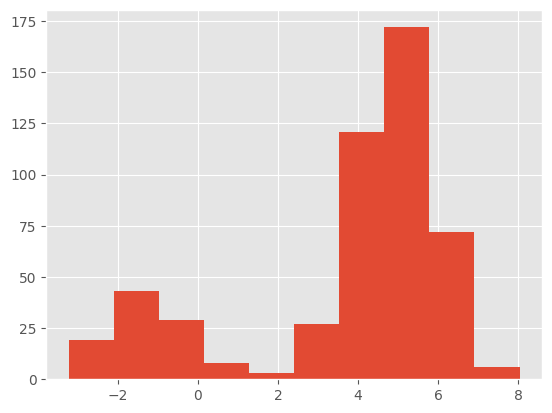

In [16]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

In [21]:
def ks_plot_2sample(data_1, data_2):
    """Plot the empirical CDFs for two datasets and perform the two-sample K-S test."""
    # Calculate empirical CDF for each dataset
    sorted_data_1, ecdf_1 = np.sort(data_1), np.arange(1, len(data_1) + 1) / len(data_1)
    # Reshape data_2 to be 1D if it's not
    sorted_data_2, ecdf_2 = np.sort(data_2.ravel()), np.arange(1, len(data_2.ravel()) + 1) / len(data_2.ravel())

    # Plot CDFs
    plt.figure(figsize=(12, 6))
    plt.step(sorted_data_1, ecdf_1, where='post', label='Empirical CDF (Normal Data)')
    plt.step(sorted_data_2, ecdf_2, where='post', label='Empirical CDF (Bi-modal Data)', color='red')
    plt.title('Empirical CDF Comparison')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Perform two-sample K-S test
    ks_result = stats.ks_2samp(data_1, data_2.ravel()) # Ravel data_2 here as well
    print(f"Two-sample K-S Test Result:\nStatistic: {ks_result.statistic:.6f}\nP-value: {ks_result.pvalue:.6f}")


In [20]:
N = 1000
x_1000 = np.random.normal(0, 1, N)

# Generate bi-modal data
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)),
                              np.random.normal(5, 1, int(0.4 * N))))

# Perform the two-sample K-S test
ks_result = stats.ks_2samp(x_1000, x_1000_bi)

# Print the results
print(f"Two-sample K-S Test Result:\nStatistic: {ks_result.statistic:.6f}\nP-value: {ks_result.pvalue:.6f}")

Two-sample K-S Test Result:
Statistic: 0.792000
P-value: 0.000000


Two-Sample K-S Test Result: The test statistic and p-value indicate a significant difference between the normal and bi-modal distributions.
Reason: The normal distribution is unimodal, while the bi-modal distribution has two distinct peaks. The two-sample K-S test effectively detects this difference, as evidenced by the high statistic and low p-value.